## #01. 패키지 준비하기

In [1]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import StandardScaler

In [9]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [10]:
# 데이터 불러오기
origin = read_excel("Excel Data/세종시_인구추이2018_2023.xlsx")
origin

,시점,세대수합계,남자인구,여자인구,총인구합계,내국인남자인구,내국인여자인구,내국인합계,외국인남자인구,외국인여자인구,외국인합계,인구밀도,면적,인구증가율,세대당인구,65세이상 고령자인구
0,202306,160615,195711,195860,391571,192435,193691,386126,3276,2169,5445,841,465,NaN,2,NaN
1,202305,160604,195651,195841,391492,192393,193657,386050,3258,2184,5442,841,465,NaN,2,41082.0
2,202304,160474,195574,195693,391267,192316,193509,385825,3258,2184,5442,841,465,NaN,2,41082.0
3,202303,160320,195467,195576,391043,192212,193397,385609,3255,2179,5434,841,465,NaN,2,40950.0
4,202302,160012,195327,195307,390634,192110,193175,385285,3217,2132,5349,840,465,NaN,2,40644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,201805,116639,151037,150895,301932,148481,149123,297604,2556,1772,4328,650,465,6.0,3,28019.0
62,201804,115640,149729,149613,299342,147180,147861,295041,2549,1752,4301,644,465,5.0,3,27830.0
63,201803,113853,147760,147697,295457,145235,145947,291182,2525,1750,4275,636,465,4.0,3,27541.0
64,201802,112343,146037,146171,292208,143601,144478,288079,2436,1693,4129,629,465,2.0,3,27297.0


In [11]:
# 결측치 확인
origin.isna().sum()

시점              0
세대수합계           0
남자인구            0
여자인구            0
총인구합계           0
내국인남자인구         0
내국인여자인구         0
내국인합계           0
외국인남자인구         0
외국인여자인구         0
외국인합계           0
인구밀도            0
면적              0
인구증가율          17
세대당인구           0
65세이상 고령자인구    10
dtype: int64

In [12]:
# 기초통계량 확인
origin.describe()

,시점,세대수합계,남자인구,여자인구,총인구합계,내국인남자인구,내국인여자인구,내국인합계,외국인남자인구,외국인여자인구,외국인합계,인구밀도,면적,인구증가율,세대당인구,65세이상 고령자인구
count,66.00000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.0,49.000000,66.000000,56.000000
mean,202033.50000,140818.030303,176671.545455,176256.106061,352937.863636,173548.333333,174250.348485,347827.439394,3115.606061,2008.075758,5110.424242,759.075758,465.0,7.387755,2.606061,33272.892857
std,160.85696,15060.474064,14910.164732,14956.550572,29876.720032,14798.153799,14869.213471,29699.063738,298.206169,176.034814,413.881033,64.114156,0.0,6.754062,0.492366,4076.383628
min,201801.00000,110573.000000,143691.000000,143594.000000,287285.000000,141253.000000,141945.000000,283198.000000,2436.000000,1649.000000,4087.000000,618.000000,465.0,0.000000,2.000000,27052.000000
25%,201905.25000,129273.250000,166129.750000,165511.750000,331641.500000,162815.500000,163428.000000,326243.500000,2937.000000,1904.750000,4929.750000,713.000000,465.0,2.000000,2.000000,29868.500000
50%,202009.50000,140954.500000,177677.000000,177116.500000,354793.500000,174374.000000,175136.500000,349510.500000,3115.000000,1990.000000,5082.000000,763.000000,465.0,4.000000,3.000000,33027.000000
75%,202201.75000,155715.000000,190444.750000,190338.000000,380782.750000,187620.250000,188273.250000,375893.500000,3296.000000,2113.000000,5384.500000,819.000000,465.0,12.000000,3.000000,36242.000000
max,202306.00000,160615.000000,195711.000000,195860.000000,391571.000000,192435.000000,193691.000000,386126.000000,3628.000000,2937.000000,5814.000000,841.000000,465.0,22.000000,3.000000,41082.000000


> 평균값의 차이가 크기 때문에 표준화가 필요해 보인다.

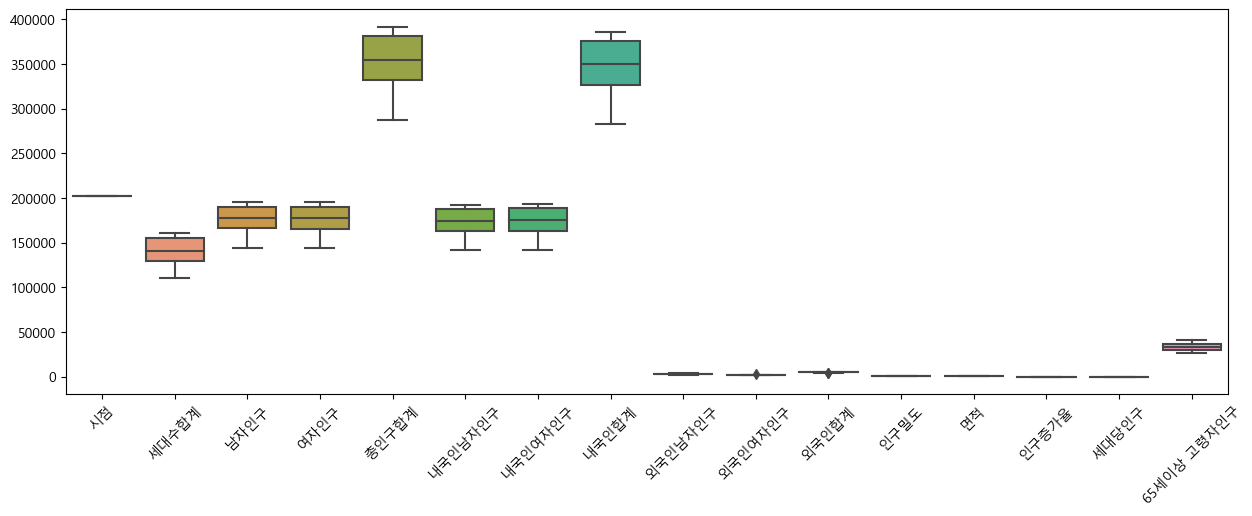

In [13]:
# boxplot 확인
plt.figure(figsize=(15, 5))
sb.boxplot(data=origin)
plt.xticks(rotation=45)
plt.show()
plt.close()

> 데이터의 분포가 상이하므로 표준화가 필요해 보인다.

c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x3000 with 0 Axes>

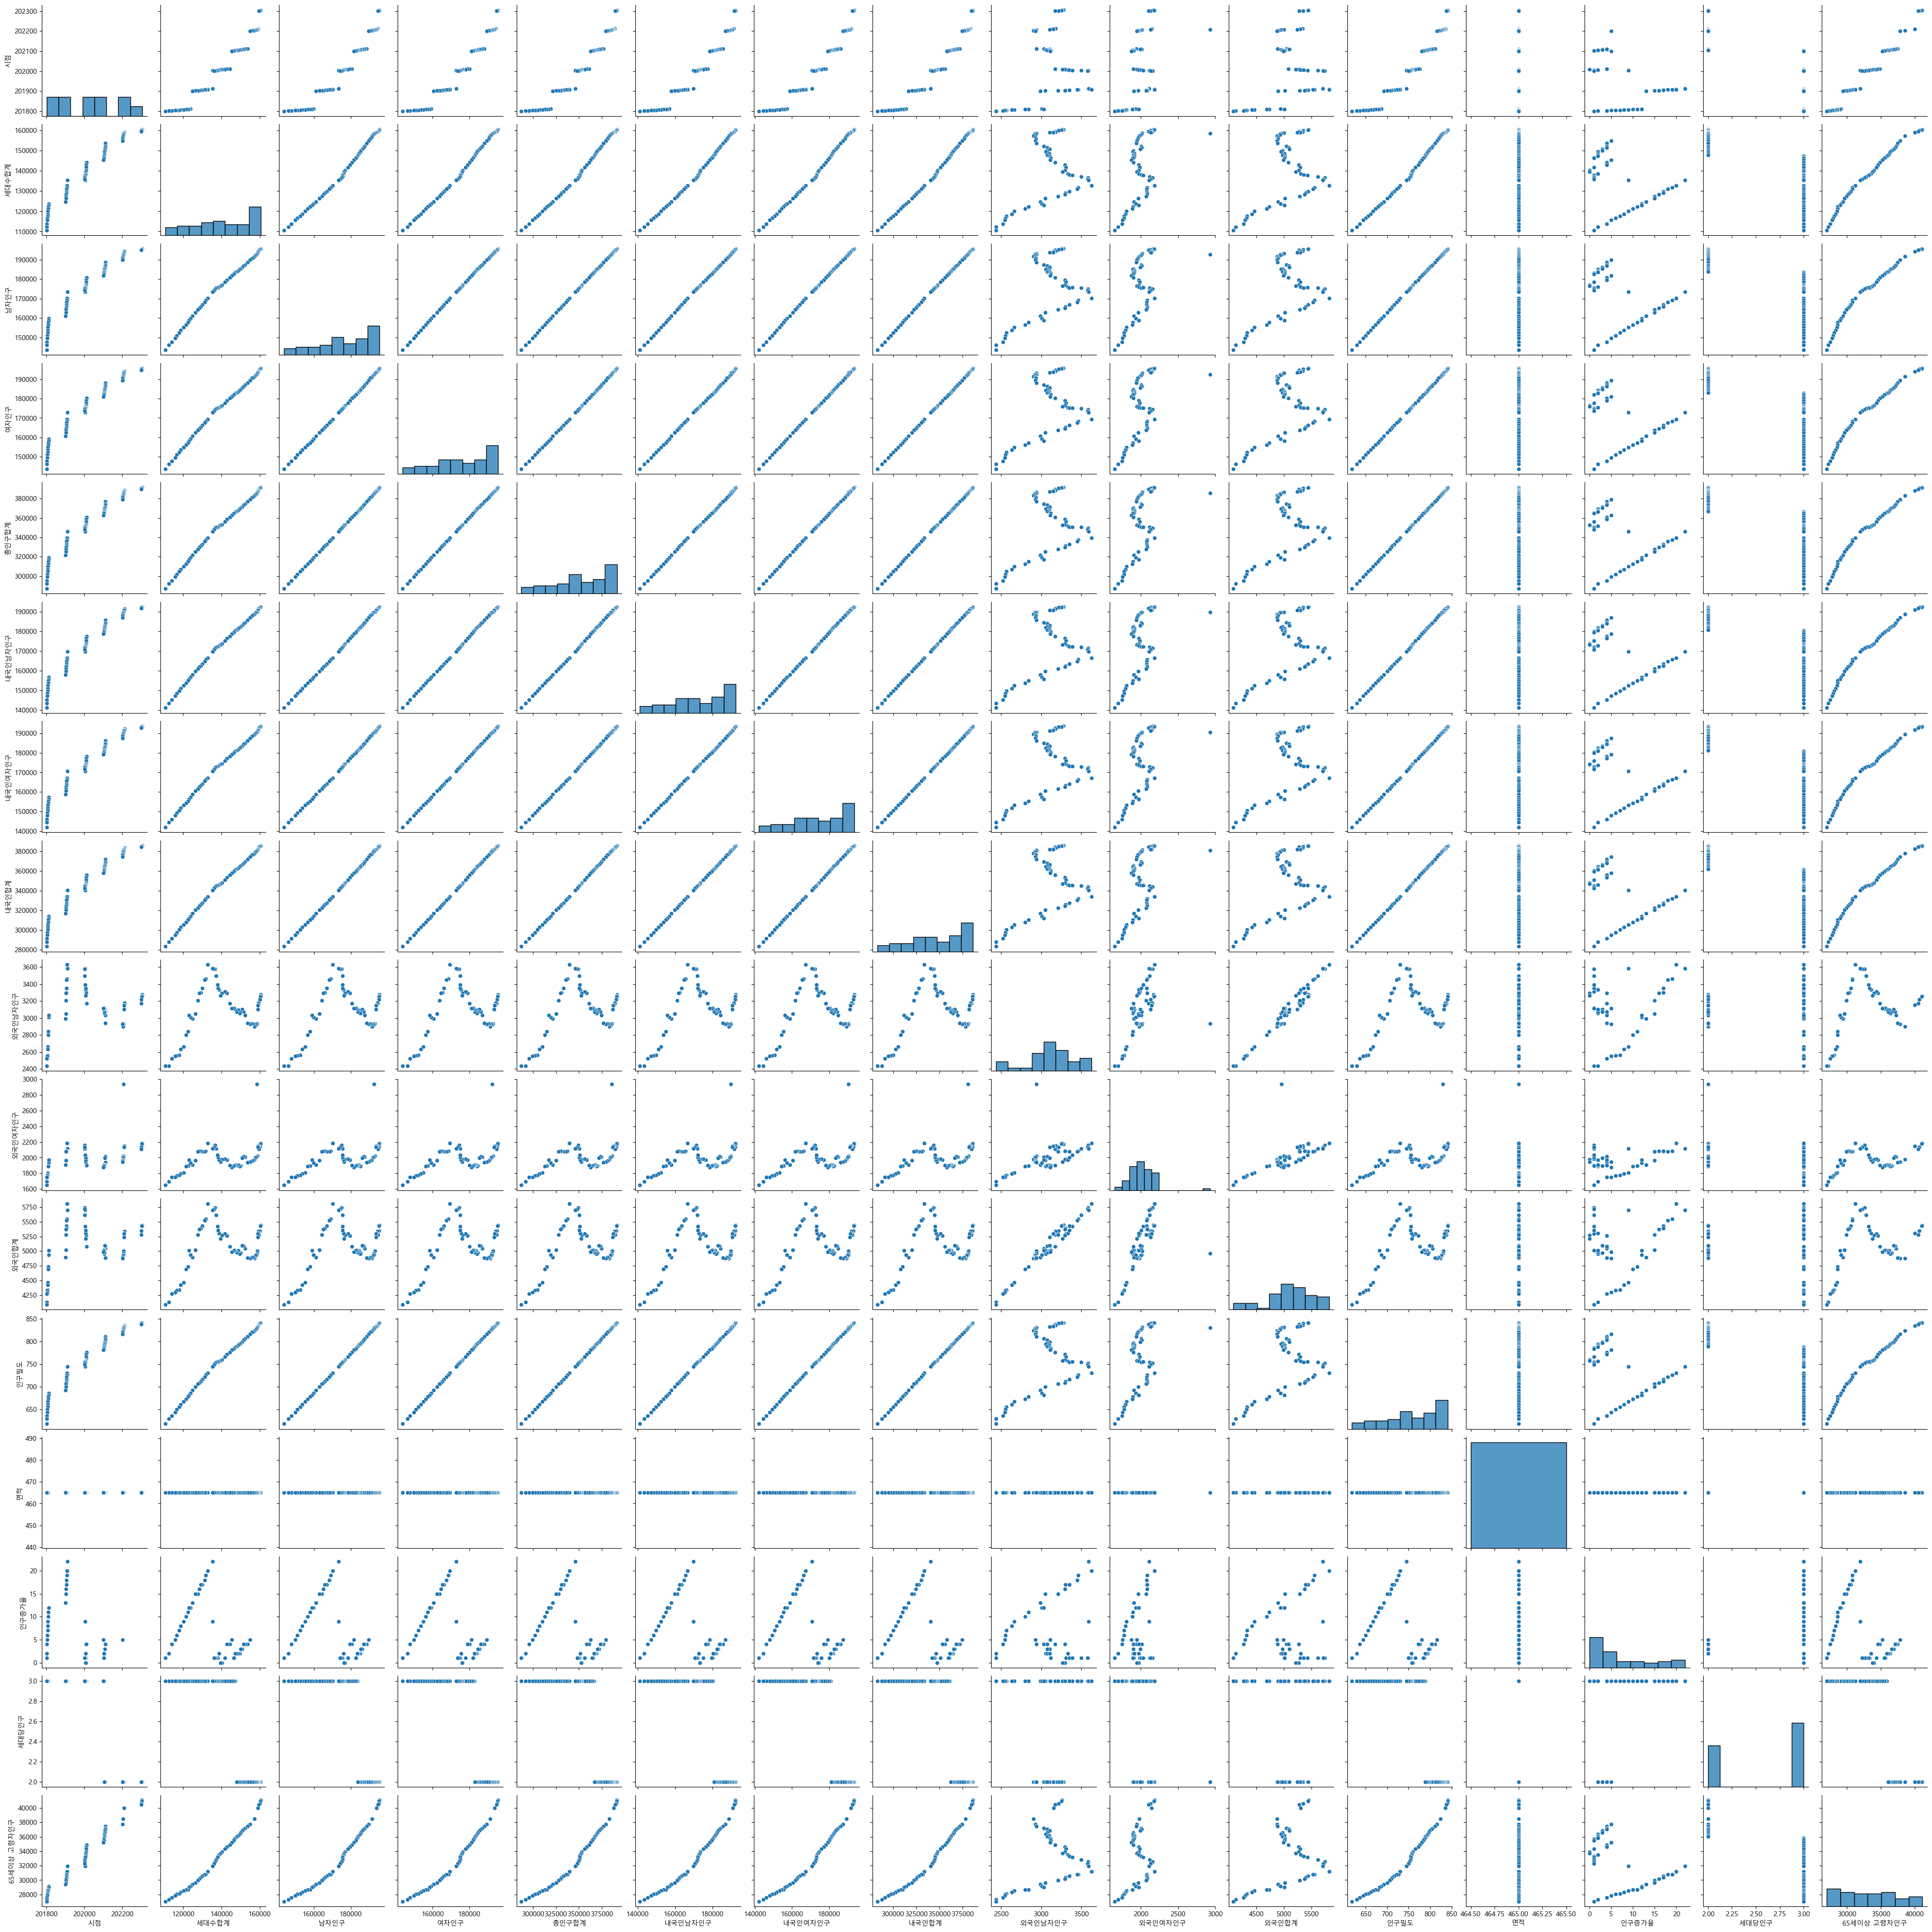

In [14]:
# 산점도 행렬 확인
plt.figure(figsize=(30, 30))
sb.pairplot(origin)
plt.show()
plt.close()

In [22]:
# 랜덤 시드 고정
np.random.seed(777)

In [23]:
origin.columns

Index(['시점', '세대수합계', '남자인구', '여자인구', '총인구합계', '내국인남자인구', '내국인여자인구', '내국인합계',
       '외국인남자인구', '외국인여자인구', '외국인합계', '인구밀도', '면적', '인구증가율', '세대당인구',
       '65세이상 고령자인구'],
      dtype='object')

In [24]:
# 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기
x = origin[['외국인합계', '총인구합계', '세대수합계']]
y = origin[['인구밀도']]
x.shape, y.shape

((66, 3), (66, 1))

In [25]:
# 데이터 표준화 진행

x_scaller = StandardScaler()
x_scale = x_scaller.fit_transform(x)

y_scaller = StandardScaler()
y_scale = y_scaller.fit_transform(y)

x_scale.shape, y_scale.shape

((66, 3), (66, 1))

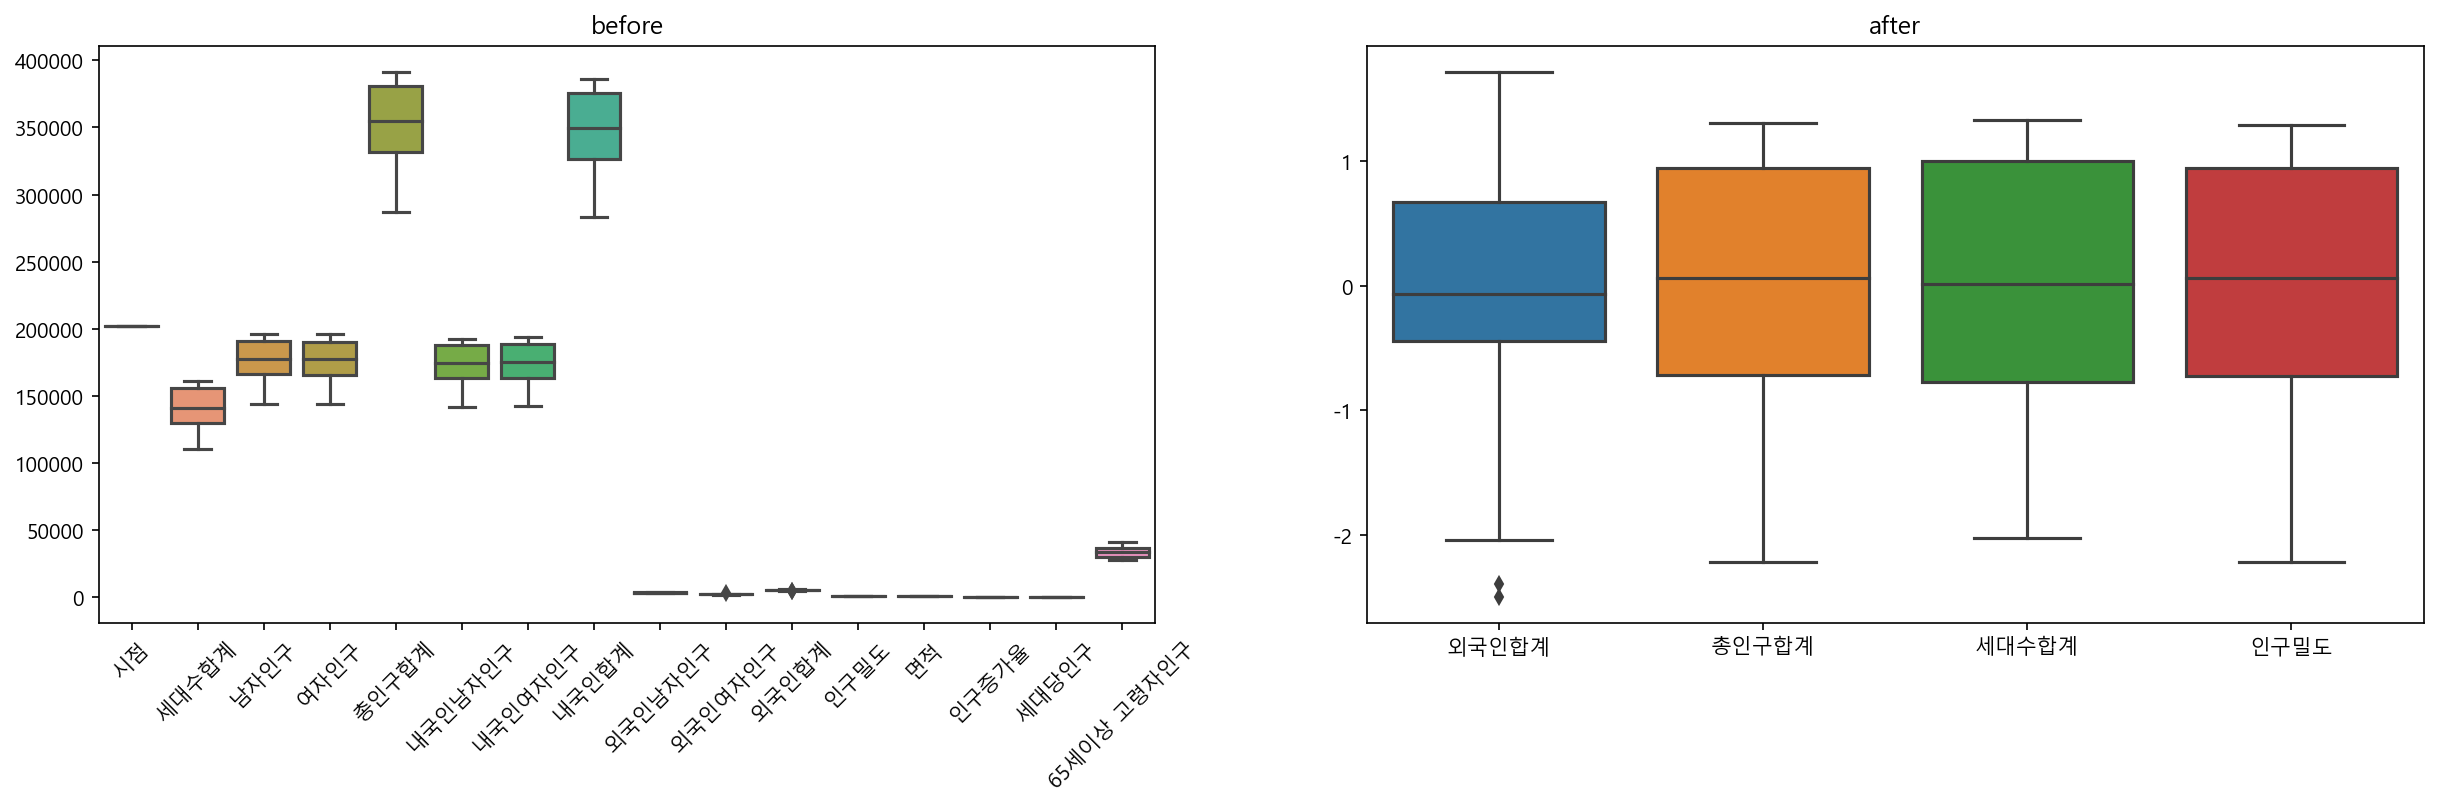

In [26]:
# 표준화 전 후 boxplot 비교

# 임시로 독립변수와 종속변수를 하나의 DataFrame으로 병합
x_scale_df = DataFrame(x_scale, columns=['외국인합계', '총인구합계', '세대수합계'])
y_scale_df = DataFrame(y_scale, columns=['인구밀도'])
tmp = merge(x_scale_df, y_scale_df, left_index=True, right_index=True)

fig, ax = plt.subplots(1, 2, figsize=(20, 5), dpi=150)
sb.boxplot(data=origin, ax=ax[0])
sb.boxplot(data=tmp, ax=ax[1])
ax[0].set_title('before')
ax[0].set_xticklabels(origin.columns, rotation=45) # x축  변수가 많아 글자가 겹치므로 rotation 파라미터로 각도 조절
ax[1].set_title('after')
plt.show()
plt.close()

### 훈련 데이터와 검증 데이터로 분할

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scale, test_size=0.3, random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((46, 3), (20, 3), (46, 1), (20, 1))

### 모델 개발

### 모델 정의

데이터가 단순하고 개수가 적다면 과대적합이 발생할 확률이 높기 때문에 주의하면서 적절한 크기의 모델층을 쌓아야 한다.

In [28]:
model = Sequential()

# 1차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (len(x_train[0]), )))
model.add(Dense(32, activation = 'relu'))

# 하나의 값을 출력 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2369 (9.25 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

In [29]:
result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), callbacks=[
    EarlyStopping(monitor='val_loss', patience=10, verbose=1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.001, verbose=1)
])

Epoch 1/500
2/2 [==============================] - 1s 208ms/step - loss: 0.8477 - mae: 0.7914 - val_loss: 0.8249 - val_mae: 0.7263 - lr: 0.0010
Epoch 2/500
2/2 [==============================] - 0s 33ms/step - loss: 0.6927 - mae: 0.7140 - val_loss: 0.6818 - val_mae: 0.6562 - lr: 0.0010
Epoch 3/500
2/2 [==============================] - 0s 33ms/step - loss: 0.5588 - mae: 0.6405 - val_loss: 0.5569 - val_mae: 0.5879 - lr: 0.0010
Epoch 4/500
2/2 [==============================] - 0s 51ms/step - loss: 0.4574 - mae: 0.5738 - val_loss: 0.4501 - val_mae: 0.5228 - lr: 0.0010
Epoch 5/500
2/2 [==============================] - 0s 41ms/step - loss: 0.3575 - mae: 0.5038 - val_loss: 0.3622 - val_mae: 0.4626 - lr: 0.0010
Epoch 6/500
2/2 [==============================] - 0s 32ms/step - loss: 0.2771 - mae: 0.4420 - val_loss: 0.2867 - val_mae: 0.4052 - lr: 0.0010
Epoch 7/500
2/2 [==============================] - 0s 34ms/step - loss: 0.2104 - mae: 0.3819 - val_loss: 0.2200 - val_mae: 0.3489 - lr: 0.001

### 학습 결과 평가

In [30]:
# 학습결과
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,0.847709,0.791381,0.824923,0.726341,0.001
2,0.692697,0.714004,0.681815,0.656181,0.001
3,0.558764,0.640451,0.556921,0.587868,0.001
4,0.457410,0.573842,0.450093,0.522760,0.001
5,0.357462,0.503753,0.362184,0.462589,0.001
6,0.277069,0.442015,0.286698,0.405164,0.001
7,0.210389,0.381895,0.220013,0.348939,0.001
8,0.160887,0.326717,0.161937,0.293775,0.001
9,0.114065,0.272673,0.114904,0.242386,0.001


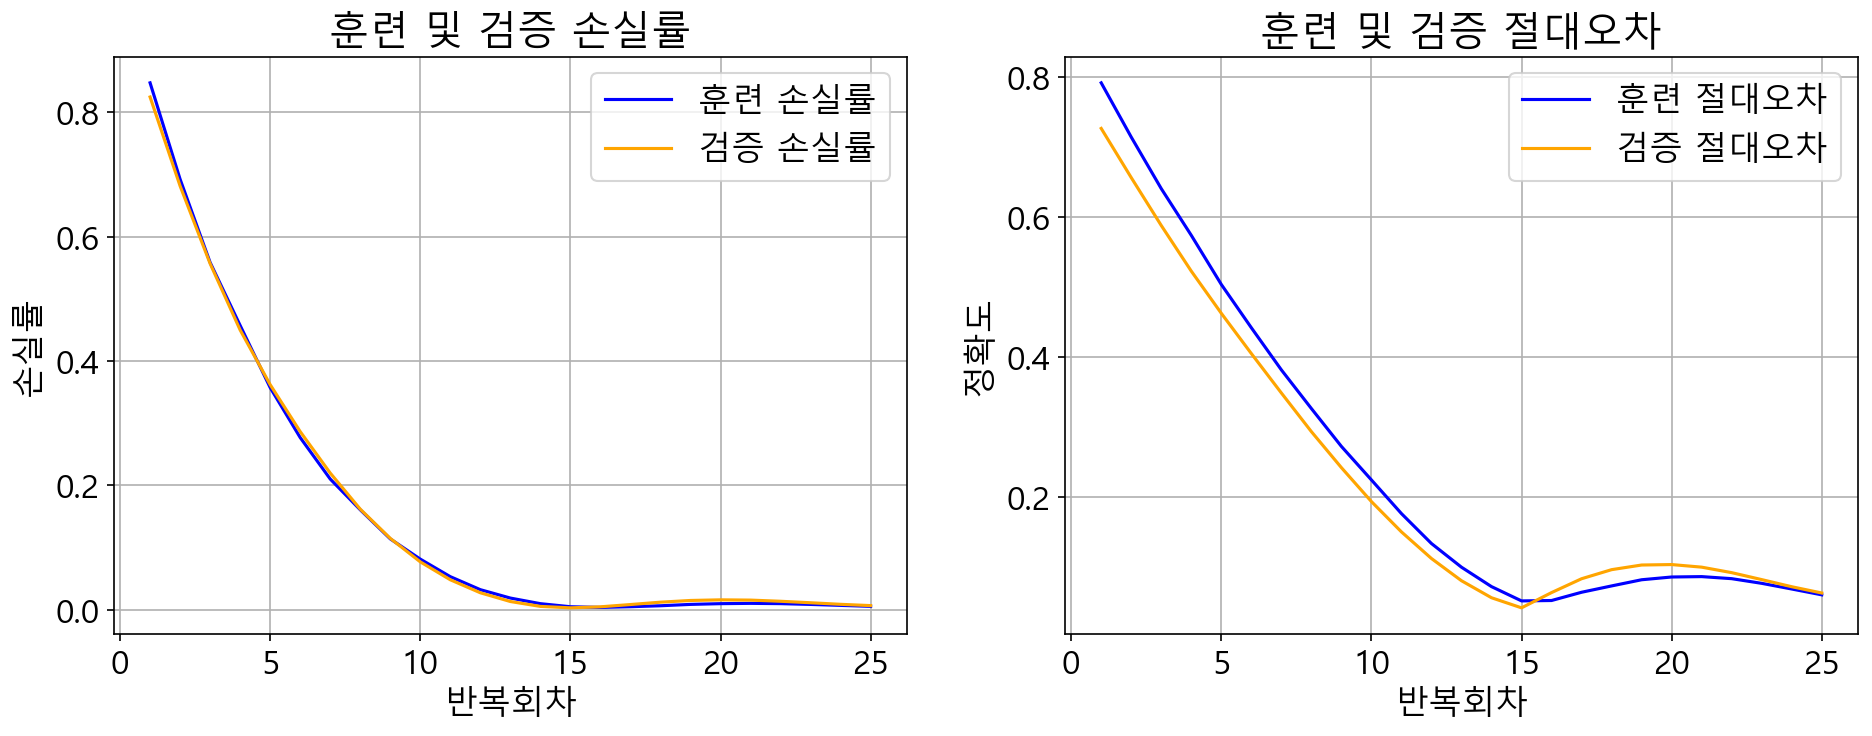

In [31]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

In [32]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 0s/step - loss: 0.0043 - mae: 0.0534
최종 훈련 손실률: 0.004276, 최종 훈련 절대오차: 0.053394
1/1 [==============================] - 0s 32ms/step - loss: 0.0067 - mae: 0.0635
최종 검증 손실률: 0.006726, 최종 검증 절대오차: 0.063531


### 학습 결과 적용

In [33]:
# 예측 결과 산정
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

1/1 [==============================] - 0s 27ms/step


In [34]:
train_df = DataFrame(x_train, columns=['외국인합계', '총인구합계', '세대수합계'])
train_df['인구밀도(관측치)'] = y_train.flatten()
train_df['인구밀도(예측치)'] = train_pred.flatten()

train_df['훈련오차'] = train_df['인구밀도(관측치)']-train_df['인구밀도(예측치)']

train_df.head()

,외국인합계,총인구합계,세대수합계,인구밀도(관측치),인구밀도(예측치),훈련오차
0,0.597895,-0.075578,-0.177375,-0.079774,-0.140517,0.060742
1,0.780496,-0.669956,-0.728026,-0.677009,-0.621227,-0.055781
2,0.420165,-0.841898,-0.891950,-0.834176,-0.791765,-0.042411
3,0.787800,1.285186,1.304834,1.287579,1.325314,-0.037735
4,-0.526921,0.956344,1.015123,0.957528,0.997063,-0.039535


In [35]:
test_df = DataFrame(x_test, columns=['외국인합계', '총인구합계', '세대수합계'])
test_df['인구밀도(관측치)'] = y_test.flatten()
test_df['인구밀도(예측치)'] = test_pred.flatten()

test_df['훈련오차'] = test_df['인구밀도(관측치)']-test_df['인구밀도(예측치)']

test_df.head()

,외국인합계,총인구합계,세대수합계,인구밀도(관측치),인구밀도(예측치),훈련오차
0,0.308170,1.154290,1.218924,1.146128,1.197513,-0.051385
1,-1.970679,-1.807647,-1.684606,-1.808611,-1.956923,0.148312
2,-2.033981,-1.938678,-1.804170,-1.934345,-2.077395,0.143050
3,-0.030249,0.631381,0.670615,0.627477,0.680745,-0.053268
4,-0.573180,0.887506,0.941524,0.894661,0.933370,-0.038708


### 실제 결과값과 머신러닝에 의한 예측값 비교

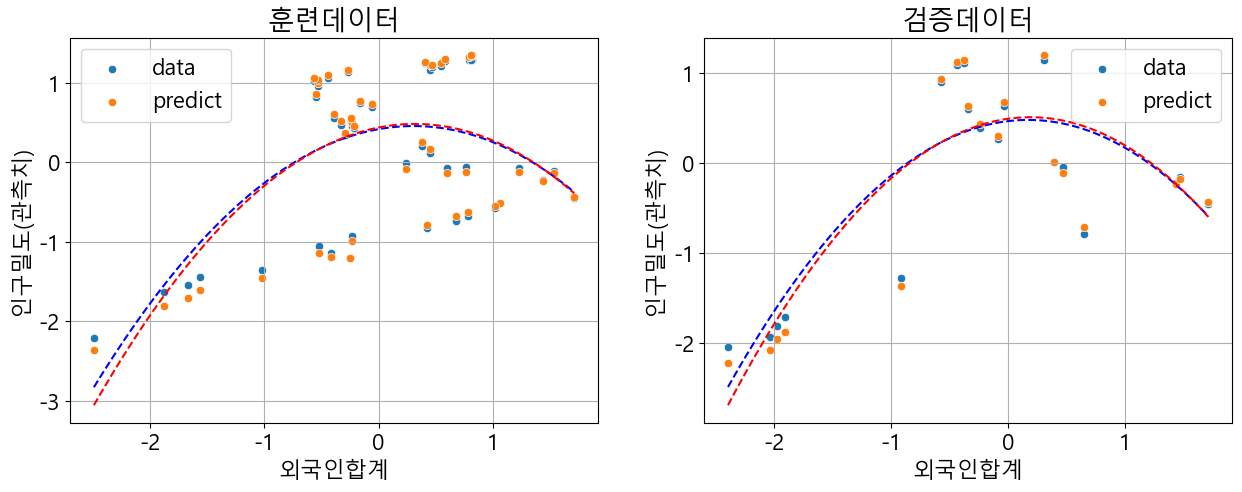

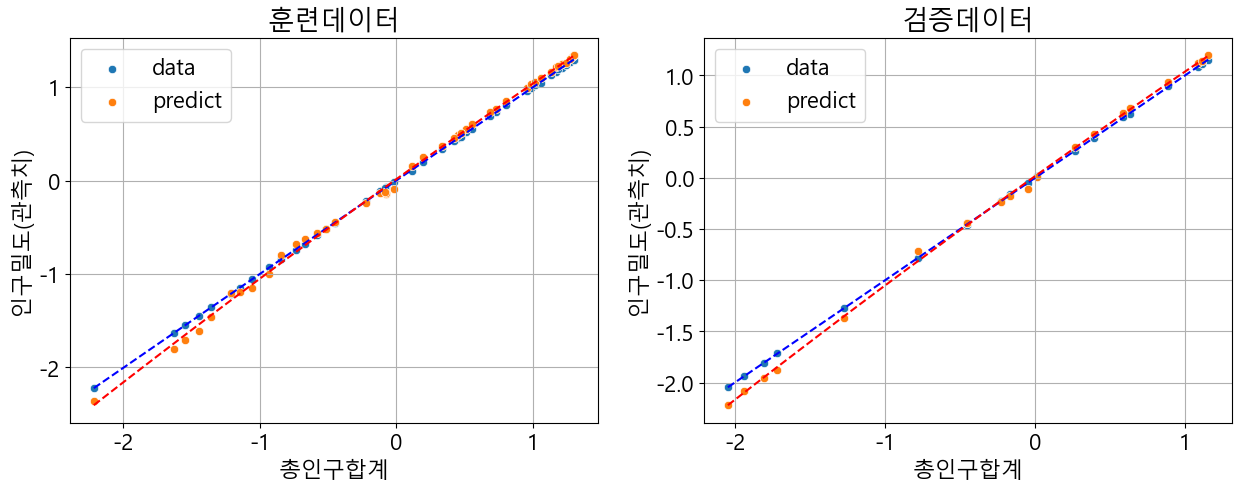

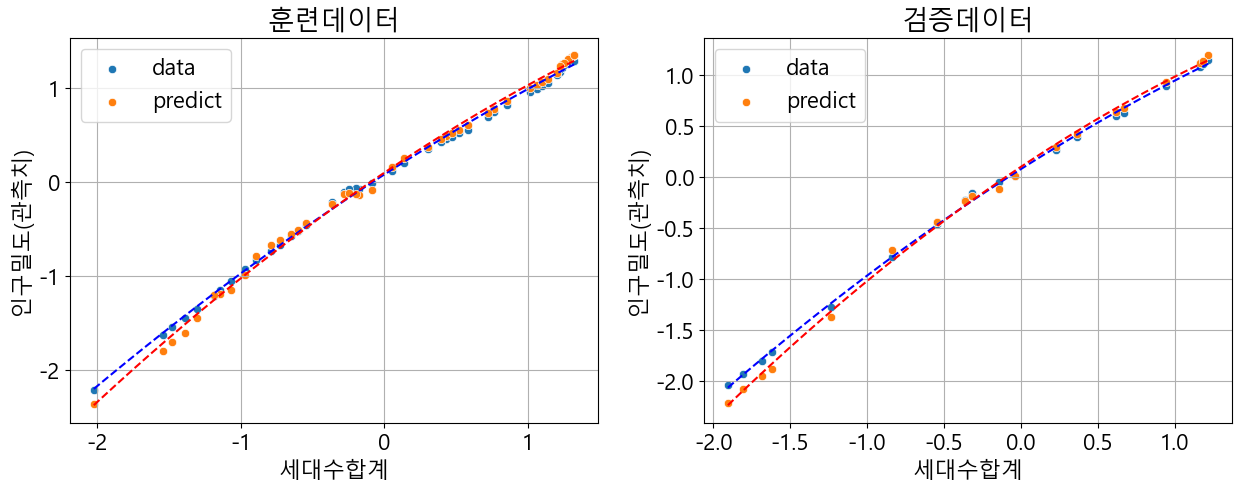

In [36]:
for key in ['외국인합계', '총인구합계', '세대수합계']:
    helper.regplot(train_df[key], train_df['인구밀도(관측치)'], train_df['인구밀도(예측치)'], "훈련데이터",
                   test_df[key], test_df['인구밀도(관측치)'], test_df['인구밀도(예측치)'], "검증데이터",
                   figsize=(15, 5))